# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
city_list = []
country = []
temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []
date = []
index_counter = 0
set_counter = 1

In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [70]:
print("Start data retrieval")
print("------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if index_counter > 49:
        index_counter = 0
        set_counter += 1
    else:
        index_counter +=1 
    print (f"City number {index_counter} of set {set_counter} - {city}")
    
    try:
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        city_list.append(city)
    except:
        print("City not found")
        
print("-------------------")
print("Data retrieval complete")

Start data retrieval
------------------
City number 1 of set 1 - puerto cabezas
City number 2 of set 1 - nouadhibou
City number 3 of set 1 - hermanus
City number 4 of set 1 - mount gambier
City number 5 of set 1 - malkapur
City number 6 of set 1 - port alfred
City number 7 of set 1 - puerto madryn
City number 8 of set 1 - santa vitoria
City number 9 of set 1 - san patricio
City number 10 of set 1 - ushuaia
City number 11 of set 1 - pinega
City number 12 of set 1 - gimli
City number 13 of set 1 - yomou
City number 14 of set 1 - bluff
City number 15 of set 1 - cape town
City number 16 of set 1 - hamilton
City number 17 of set 1 - bethel
City number 18 of set 1 - bolungarvik
City not found
City number 19 of set 1 - taolanaro
City not found
City number 20 of set 1 - tevriz
City number 21 of set 1 - kavaratti
City number 22 of set 1 - dikson
City number 23 of set 1 - mataura
City number 24 of set 1 - pisco
City number 25 of set 1 - boat of garten
City number 26 of set 1 - rikitea
City numbe

City number 22 of set 5 - tasiilaq
City number 23 of set 5 - hasaki
City number 24 of set 5 - esil
City number 25 of set 5 - hohhot
City number 26 of set 5 - san jose de guanipa
City number 27 of set 5 - quimper
City number 28 of set 5 - taldan
City number 29 of set 5 - margate
City number 30 of set 5 - esperance
City number 31 of set 5 - quatre cocos
City number 32 of set 5 - morondava
City number 33 of set 5 - harper
City number 34 of set 5 - kathu
City number 35 of set 5 - kidal
City number 36 of set 5 - biak
City number 37 of set 5 - coquimbo
City number 38 of set 5 - shellbrook
City number 39 of set 5 - ixtapa
City number 40 of set 5 - puerto narino
City number 41 of set 5 - valparaiso
City number 42 of set 5 - yushu
City number 43 of set 5 - horta
City number 44 of set 5 - tiksi
City number 45 of set 5 - bowen
City number 46 of set 5 - bingerville
City number 47 of set 5 - chagda
City not found
City number 48 of set 5 - ponta delgada
City number 49 of set 5 - sovetskoye
City numb

City number 41 of set 9 - codrington
City number 42 of set 9 - neuquen
City number 43 of set 9 - kiruna
City number 44 of set 9 - tumannyy
City not found
City number 45 of set 9 - algeciras
City number 46 of set 9 - zhitikara
City not found
City number 47 of set 9 - saint-joseph
City number 48 of set 9 - bargal
City not found
City number 49 of set 9 - la libertad
City number 50 of set 9 - auki
City number 0 of set 10 - nata
City number 1 of set 10 - hato mayor
City number 2 of set 10 - modrica
City number 3 of set 10 - sant feliu de guixols
City number 4 of set 10 - killam
City number 5 of set 10 - ulladulla
City number 6 of set 10 - vlasim
City number 7 of set 10 - alugan
City number 8 of set 10 - saint anthony
City number 9 of set 10 - camacha
City number 10 of set 10 - saint-pierre
City number 11 of set 10 - creel
City number 12 of set 10 - santa maria
City number 13 of set 10 - anloga
City number 14 of set 10 - rudnogorsk
City number 15 of set 10 - presidencia roque saenz pena
City

In [71]:

print(len(city_list))   
print(len(country)) 
print(len(temp)) 
print(len(humidity)) 
print(len(wind_speed)) 
print(len(clouds)) 
print(len(latitude)) 
print(len(longitude))


552
552
552
552
552
552
552
552


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
 city_data = pd.DataFrame({"City":city_list,
                          "Country": country,
                          "Date":date,
                          "Max Temp (F)":temp,
                          "Humidity (%)":humidity,
                          "Wind Speed":wind_speed, 
                          "Cloudiness (%)": clouds,
                          "Latitude":latitude,
                          "Longitude":longitude})
# city_data['Date'] =pd.to_datetime(city_data.Date).dt.strftime('%m/%d/%Y')    
city_data.head()

,City,Country,Date,Max Temp (F),Humidity (%),Wind Speed,Cloudiness (%),Latitude,Longitude
0,puerto cabezas,NI,1603992923,84.20,83,9.17,40,14.04,-83.39
1,nouadhibou,MR,1603992644,75.20,60,17.22,22,20.93,-17.03
2,hermanus,ZA,1603992924,55.00,64,1.99,70,-34.42,19.23
3,mount gambier,AU,1603992924,51.80,93,6.93,90,-37.83,140.77
4,malkapur,IN,1603992924,73.22,44,2.64,0,20.88,76.20


In [75]:
city_data.count()

City              552
Country           552
Date              552
Max Temp (F)      552
Humidity (%)      552
Wind Speed        552
Cloudiness (%)    552
Latitude          552
Longitude         552
dtype: int64

In [100]:
city_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
humidity_df = city_data.loc[city_data["Humidity (%)"]>100,:]
humidity_df.count()

City              0
Country           0
Date              0
Max Temp (F)      0
Humidity (%)      0
Wind Speed        0
Cloudiness (%)    0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

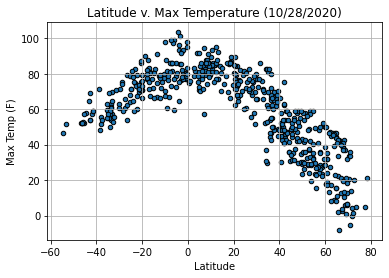

In [78]:
city_data.plot(kind="scatter",x="Latitude", y="Max Temp (F)",edgecolor="black",title="Latitude v. Max Temperature (10/28/2020)",grid=True)
plt.savefig("output_data/LatvTemp.png")
plt.show()

## Latitude vs. Humidity Plot

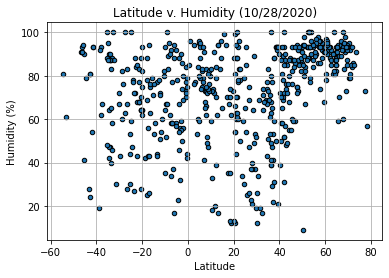

In [79]:
city_data.plot(kind="scatter",x="Latitude", y="Humidity (%)",edgecolor="black",title="Latitude v. Humidity (10/28/2020)",grid=True)
plt.savefig("output_data/LatvHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

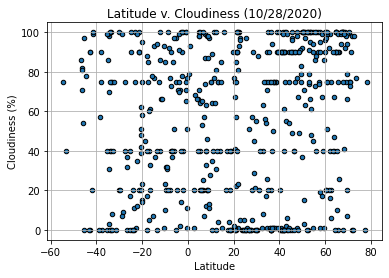

In [80]:
city_data.plot(kind="scatter",x="Latitude", y="Cloudiness (%)",edgecolor="black",title="Latitude v. Cloudiness (10/28/2020)",grid=True)
plt.savefig("output_data/LatvCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

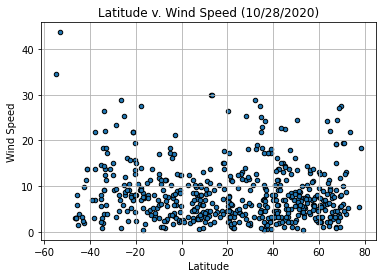

In [81]:
city_data.plot(kind="scatter",x="Latitude", y="Wind Speed",edgecolor="black",title="Latitude v. Wind Speed (10/28/2020)",grid=True)
plt.savefig("output_data/LatvWindspeed.png")
plt.show()

## Linear Regression

In [82]:
northern_hemi_df = city_data.loc[city_data["Latitude"]>= 0,:]
northern_hemi_df["Latitude"].count()

383

In [83]:
southern_hemi_df = city_data.loc[city_data["Latitude"]< 0,:]
southern_hemi_df["Latitude"].count()

169

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [84]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

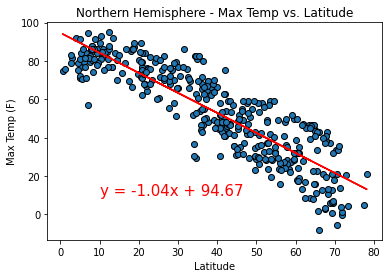

The correlation coefficient is -0.88, suggesting there is a strong negative relationship 


In [85]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq,(10,10),color="r",fontsize=15)
plt.savefig("output_data/NHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a strong negative relationship ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [86]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

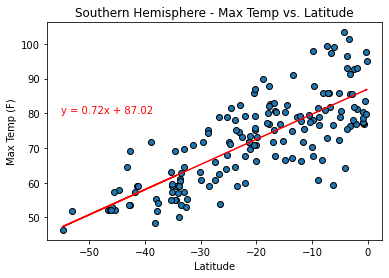

The correlation coefficient is 0.78, suggesting there is a moderate-strong positive relationship 


In [87]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq, (-55,80),color="r")
plt.savefig("output_data/SHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a moderate-strong positive relationship ")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [88]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])[0],2)
eq = eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

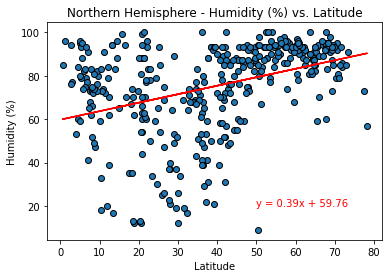

The correlation coefficient is 0.38, suggesting there is a weak positive relationship 


In [89]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq, (50,20),color="r")
plt.savefig("output_data/NHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [90]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

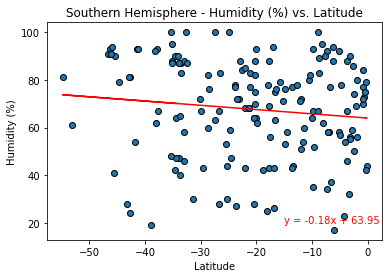

The correlation coefficient is -0.12, suggesting there is a weak negative relationship 


In [91]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq,(-15,20),color="r")
plt.savefig("output_data/SHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak negative relationship ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [92]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

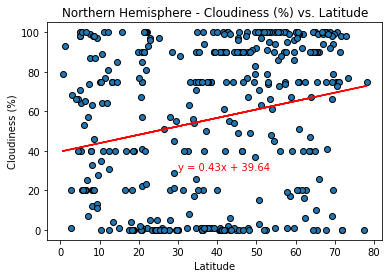

The correlation coefficient is 0.22, suggesting there is a weak positive relationship 


In [93]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq, (30,30),color="r")
plt.savefig("output_data/NHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak positive relationship ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [94]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

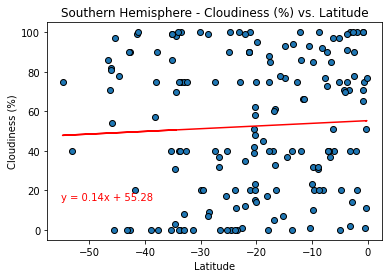

The correlation coefficient is 0.05, suggesting there is a minimal relationship 


In [95]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq,(-55,15),color='r')
plt.savefig("output_data/SHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a minimal relationship ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [96]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

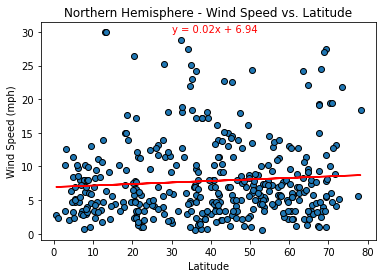

The correlation coefficient is 0.08, suggesting there is a minimal relationship 


In [97]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(30,30),color="r")
plt.savefig("output_data/NHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a minimal relationship ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [98]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

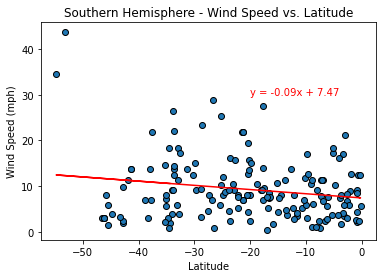

The correlation coefficient is -0.18, suggesting there is a weak negative relationship 


In [99]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(-20,30),color="r")
plt.savefig("output_data/SHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, suggesting there is a weak negative relationship ")